Use NonERL_MagVerle to see how charge 1C, 1kg, moves in Bx = A*z, By = 0, Bz = 1 + (A*x), A = 0.1 T/m. Init. values: x_0=y_0=z_0=0, V_x = 0, V_y = 1, V_z = 1. 
Modify T_sim = 3000s, dt=0.01s, T_smp=0.1 s

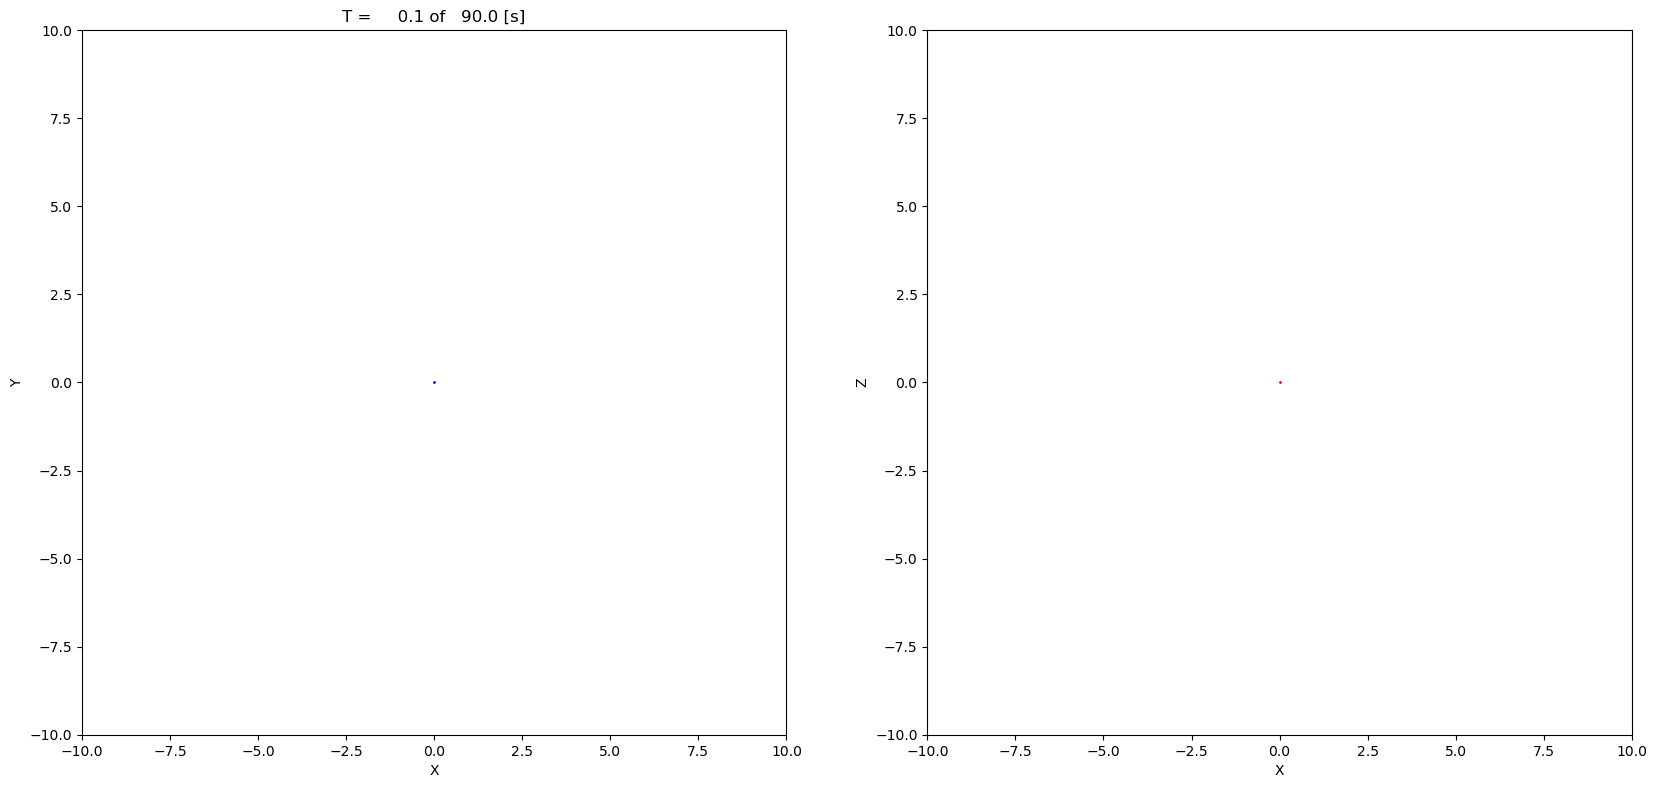

[0.00011651]


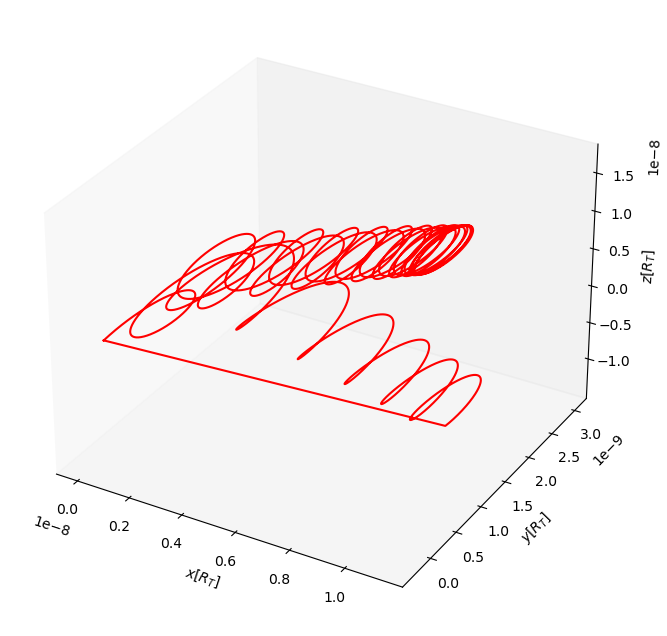

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import PVREDNOSTI, IZLAZ, DEFPOLJA # Input files (PVREDNOSTI: initial conditions are there; IZLAZ: output to be shown in graph is there; DEFPOLJA: field definitions are there)

#############################
# Input parameters
#############################

N = 1 # we use only one particle

T_sim = 90.0 # simulation duration [s]
dt = 0.01 # time step
T_smp = 0.1 # times step for graphical representation

##########################
# definitions of variables
##########################

l = 0
q = np.zeros(N)
m = np.zeros(N)
x = np.zeros(N)
y = np.zeros(N)
z = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)
vz = np.zeros(N)
EPx = 0.0
EPy = 0.0
EPz = 0.0
BPx = 0.0
BPy = 0.0
BPz = 0.0   
pomx = np.zeros(N)
pomy = np.zeros(N)
pomz = np.zeros(N)

#################
# initialization
#################

t = 0.0
 
q, m, x, y, z, vx, vy, vz = PVREDNOSTI.puslovi3(N, np)

BPx, BPy, BPz, EPx, EPy, EPz = DEFPOLJA.const_B3(x, y, z, t)

fig, sp1, sp2 = IZLAZ.init_plots(plt)


xx = np.zeros(10000000)
yy = np.zeros(10000000)
zz = np.zeros(10000000)

ii = 0

xx[ii] = x
yy[ii] = y
zz[ii] = z


###############
# Main loop
###############
# See
# https://aapt.scitation.org/doi/10.1119/10.0001876
# https://arxiv.org/abs/2008.11810
# https://www.compadre.org/PICUP/resources/Numerical-Integration/

kinetickainit = m*0.5*(vx**2.0 + vy**2.0 + vz**2.0)

while t < (T_sim - dt):

    t = t + dt

    pomx = vx + ((q*dt*0.5/m)*(EPx + (vy*BPz) - (BPy*vz)))
    pomy = vy + ((q*dt*0.5/m)*(EPy + (vz*BPx) - (BPz*vx)))
    pomz = vz + ((q*dt*0.5/m)*(EPz + (vx*BPy) - (BPx*vy)))
    #print(pomx)

    x = x + (pomx*dt)
    y = y + (pomy*dt)
    z = z + (pomz*dt)
    

    BPx, BPy, BPz, EPx, EPy, EPz = DEFPOLJA.const_B3(x, y, z, t)
    #print(x)
    pomx = pomx + ((q*dt*0.5/m)*EPx)
    pomy = pomy + ((q*dt*0.5/m)*EPy)
    pomz = pomz + ((q*dt*0.5/m)*EPz)
    #print(pomx)

    vx = ((1.0 + (((q*dt*0.5/m)**2.0)*(BPx**2.0 + BPy**2.0 + BPz**2.0)))**(-1.0))*(pomx + ((q*dt*0.5/m)*(pomy*BPz - pomz*BPy)) + (((q*dt*0.5/m)**2.0)*BPx*(pomx*BPx + pomy*BPy + pomz*BPz)))

    vy = ((1.0 + (((q*dt*0.5/m)**2.0)*(BPx**2.0 + BPy**2.0 + BPz**2.0)))**(-1.0))*(pomy + ((q*dt*0.5/m)*(pomz*BPx - pomx*BPz)) + (((q*dt*0.5/m)**2.0)*BPy*(pomx*BPx + pomy*BPy + pomz*BPz))) 

    vz = ((1.0 + (((q*dt*0.5/m)**2.0)*(BPx**2.0 + BPy**2.0 + BPz**2.0)))**(-1.0))*(pomz + ((q*dt*0.5/m)*(pomx*BPy - pomy*BPx)) + (((q*dt*0.5/m)**2.0)*BPz*(pomx*BPx + pomy*BPy + pomz*BPz)))

    ii = ii + 1
    xx[ii] = x
    yy[ii] = y
    zz[ii] = z 
    ###################################
    # show in graph
    ###################################

    l += 1

    if l*dt >= T_smp:

        l = 0.0
        IZLAZ.write_plots(sp1, sp2, plt, x, y, z, t, T_sim) # show in real time

kinetickafin = m*0.5*(vx**2.0 + vy**2.0 + vz**2.0)

ans = (kinetickainit - kinetickafin)/kinetickainit
print(ans)
#print (kinetickainit - kinetickafin)/kinetickainit

d = 1e9
fig = plt.figure(figsize=(10,8)) #graph
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('auto')
ax.grid(False)
plt.xlabel("$x[R_T]$")
plt.ylabel("$y[R_T]$")
ax.set_zlabel("$z[R_T]$")
plt.axis('on')
#ax.set_xlim3d(-70, 70) #change inf needed
#ax.set_ylim3d(-70, 70)
#ax.set_zlim3d(-70, 70)
plt.plot(xx/d, yy/d, zz/d, color = 'red')
plt.show()



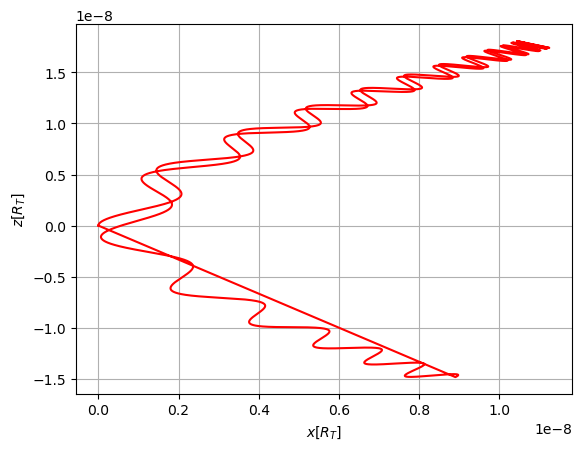

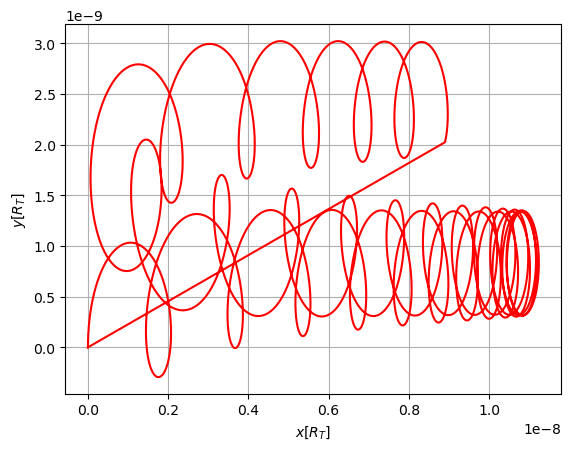

In [2]:
fig_xz = plt.figure()
ax_xz = fig_xz.add_subplot(111)
plt.xlabel("$x[R_T]$")
plt.ylabel("$z[R_T]$")
ax_xz.grid(True)

ax_xz.plot(xx/d, zz/d, color='red')
plt.show()

fig_xy = plt.figure()
ax_xy = fig_xy.add_subplot(111)
plt.xlabel("$x[R_T]$")
plt.ylabel("$y[R_T]$")
ax_xy.grid(True)

ax_xy.plot(xx/d, yy/d, color='red')
plt.show()